In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import sys,os
sys.path.insert(0,os.path.abspath('..'))
from Scripts import project_functions

## Loading raw data into dataframe

In [2]:
df = pd.read_csv('adult.data')

## Method Chaining for initial data analysis

-**Column headers need to be fixed**

    - The headers are the first row of data




In [3]:
df1 = project_functions.load_and_proccess(df)

### EDA using profile_report()

In [4]:
df1.profile_report()

## Research Question 
   **How do factors like age and race effect a persons education level?**
   - The "Education-Num" variable corresponds to the level of education (higher = more education).

In [5]:
df1


Age          Workclass  fnlwgt    Education  Education-Num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital-Status          Occupation    Realtionship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital-Gain  Capital-Loss  Hours-Per-Week  Native-Country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 15 columns]

**Average Education level by race**

In [6]:
races = set(df1['Race'])

races = list(races)

data = {'Race':races,'Avg_eNum':[]}

for race in races:
    dft = df1[df1['Race'] == race]
    data['Avg_eNum'].append(np.mean(dft['Education-Num']))


df2 = pd.DataFrame.from_dict(data)
df2 = df2.sort_values('Avg_eNum', ascending = False,ignore_index = True)
df2

Race   Avg_eNum
0   Asian-Pac-Islander  10.960539
1                White  10.135143
2                Black   9.486236
3   Amer-Indian-Eskimo   9.311897
4                Other   8.841328

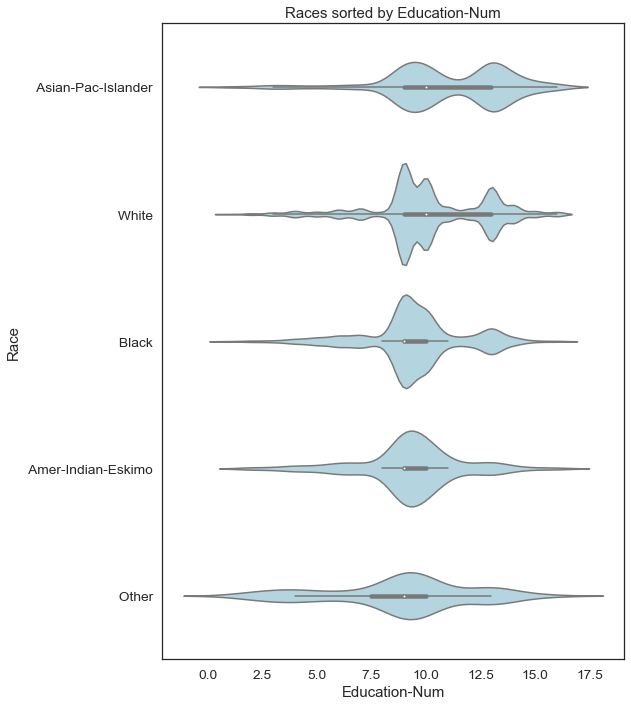

In [7]:
a4_dims = (8.27,11.7)
sns.set_theme(font_scale = 1.25)
sns.set_style("white")
fig,ax = plt.subplots(figsize=a4_dims)
sns.violinplot(x ='Education-Num', y = 'Race',ax=ax,data = df1,order = df2['Race'],color ="lightblue")
plot = plt.title("Races sorted by Education-Num")

**The above graph seems to indicate that Asiann-Pac-Islander have the highest education level in this dataset**

**Average Education level by age**

In [27]:

ages = list(df1['Age'])


ageGroups = [(0,20),(20,30),(30,40),(40,50),(50,60),(70,1000)]

Groups = ['0-20','20-30','30-40','40-50','50-60','70+']

data = {'Age Group':Groups,'Avg_eNum':[]}


for index,tuple in enumerate(ageGroups):
        low = tuple[0]
        high = tuple[1]
        dft = df1[(df1['Age'] >= low) & (df1['Age'] <= high)]
        data['Avg_eNum'].append(np.mean(dft['Education-Num']))
            
df2 = pd.DataFrame.from_dict(data)
df2

Age Group   Avg_eNum
0      0-20   8.557676
1     20-30  10.025126
2     30-40  10.349458
3     40-50  10.553941
4     50-60  10.001903
5       70+   9.381558

<AxesSubplot:xlabel='Age Group', ylabel='Avg_eNum'>

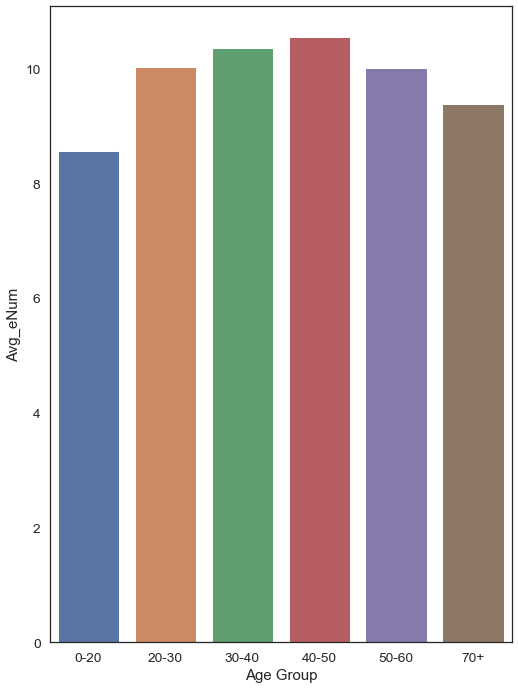

In [26]:

fig,ax = plt.subplots(figsize=a4_dims)
sns.barplot(y ='Avg_eNum', x ='Age Group',ax=ax,data = df2)


**The above graph shows the education level by age group**
 - The youngest age group has the lowest education level. This is probably because they are not finished their education.
 - Education level appears to peak in the 40-50 age group. The individuals in this group have most likley achived the highest level of education that they are capable of.
 - The older age groups have a lower score. This is perhaps becauses education was not as available or important when they were younger.